# Adarsh Mahor
**Task: Prediction using Supervised ML** \
Predict the percentage of an student based on the no. of study hours.

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan  5 15:16:17 2021

@author: Adarsh
"""

'\nCreated on Tue Jan  5 15:16:17 2021\n\n@author: Adarsh\n'

In [2]:
# importing Libraries
import  matplotlib.pyplot as plt
import  numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  

In [3]:
# Reading data from url
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values and hence data cleaning is not required

Let's plot this data that we have on 2-D graph of our dataset and see if we can observe and find any kind of relation in the two parameters Hours and Scores.

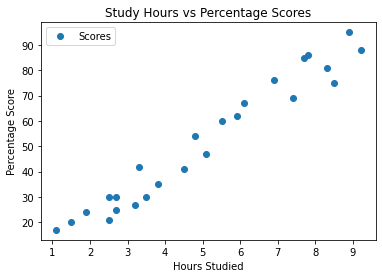

In [5]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Study Hours vs Percentage Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

C:\Users\91766\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


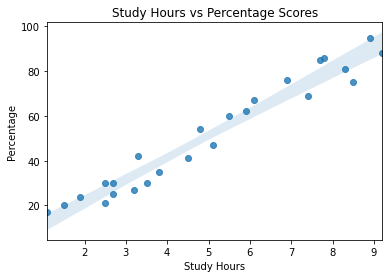

In [6]:
#plotting regressor plot to determine the relationship between feature and target
sns.regplot(x=data['Hours'],y=data['Scores'],data=data)
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

From the graph above, it can be clearly seen that there is a positive linear relation between the number of hours studied and percentage of score

In [7]:
X = data['Hours'].values.reshape(-1,1) # Attributes
y = data['Scores']                     # Labels

In [8]:
# Using Scikit-Learn's built-in train_test_split() method:

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

In [9]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [10]:
print ("Coefficient -", regressor.coef_)
print ("Intercept - ", regressor.intercept_)

Coefficient - [9.91065648]
Intercept -  2.018160041434683


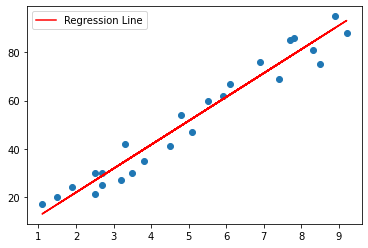

In [11]:
# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red', label='Regression Line')
plt.legend()
plt.show()

In [12]:
print(X_test)                      # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [14]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


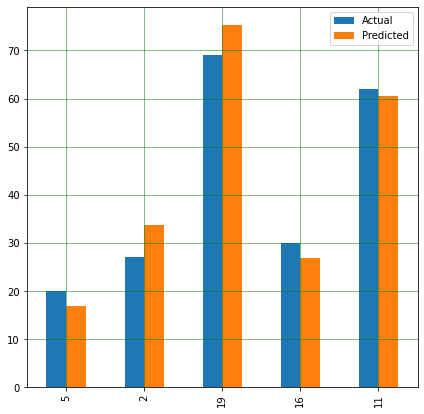

In [15]:
#plotting the grid to depict the actual and predicted value
df.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='black')
plt.show()

In [16]:
# Testing with some new data
hours = np.array([9.25]) 
hours = hours.reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(float(hours)))
print("Predicted Score = {}".format(round(own_pred[0],2)))

No of Hours = 9.25
Predicted Score = 93.69


In [17]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356
